# Project:  Super Store Data Analysis and Price Prediction
**Author:** Anam Jafar\
**Dataset Source:** Artificially Generated Dataset for Educational Purposes\
**Objective:** Perform data analysis to uncover sales trends and customer behavior, and build supervised machine learning models to predict price per unit based on sales-related features.\
**Start Date:** 15-12-24  \
**Tools Used:** Python (pandas, matplotlib, seaborn, scikit-learn)  

## Import libraries and load the dataset

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as pllt
import seaborn as sns

In [2]:
# load the dataset
df = pd.read_csv("raw_superstore_data.csv")
df.head()

,Transaction_ID,Country,Region,Store_Type,Category,Item_ID,Quantity,Price_per_Unit,Total_Sales,Discount_Applied,Day,Time_of_Purchase,Payment_Method,Customer_ID,Loyalty_Card_Used,Employee_ID,Feedback_Score,Return,Weather,Holiday
0,T2867825,UK,South,Supermarket,Fruits,I36836,43.0,344.61,NaN,False,Friday,22:01,Cash,C298340,True,E2761,NaN,NaN,Snowy,False
1,T1419610,USA,South,Wholesale,Beverages,I85457,76.0,414.14,NaN,NaN,Thursday,2:39,Cash,C467140,False,E6782,4.0,False,Sunny,NaN
2,T5614226,USA,Central,None,Beverages,I28818,53.0,157.36,NaN,NaN,Sunday,1:02,Debit Card,C203743,False,E9469,NaN,False,NaN,True
3,T5108603,Canada,East,NaN,Vegetables,I98489,29.0,371.94,NaN,True,Wednesday,18:38,NaN,C785538,False,E6376,3.0,NaN,NaN,True
4,T4744854,Brazil,West,Grocery Store,Dairy,I22306,13.0,464.09,NaN,False,Saturday,8:23,Mobile Payment,NaN,False,E8737,NaN,False,Sunny,False


## Understanding Dataset Structure:

In [3]:
# display shape(rows and column) of a dataset
print("Dataset Shape:", df.shape)
# display rows and column of a dataset separately
print("No. of rows in a dataset are:", df.shape[0])
print("No.of columns in a dataset are:", df.shape[1])

Dataset Shape: (1048575, 20)
No. of rows in a dataset are: 1048575
No.of columns in a dataset are: 20


In [4]:
# display column names
print("Column names of a dataset are:", df.columns)

Column names of a dataset are: Index(['Transaction_ID', 'Country', 'Region', 'Store_Type', 'Category',
       'Item_ID', 'Quantity', 'Price_per_Unit', 'Total_Sales',
       'Discount_Applied', 'Day', 'Time_of_Purchase', 'Payment_Method',
       'Customer_ID', 'Loyalty_Card_Used', 'Employee_ID', 'Feedback_Score',
       'Return', 'Weather', 'Holiday'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1048575 non-null  object 
 1   Country            1048575 non-null  object 
 2   Region             1048575 non-null  object 
 3   Store_Type         943973 non-null   object 
 4   Category           995824 non-null   object 
 5   Item_ID            1048575 non-null  object 
 6   Quantity           943814 non-null   float64
 7   Price_per_Unit     996363 non-null   float64
 8   Total_Sales        0 non-null        float64
 9   Discount_Applied   698844 non-null   object 
 10  Day                1048575 non-null  object 
 11  Time_of_Purchase   943491 non-null   object 
 12  Payment_Method     839174 non-null   object 
 13  Customer_ID        839050 non-null   object 
 14  Loyalty_Card_Used  699330 non-null   object 
 15  Employee_ID        943740 non-nu

In [6]:
# display column names with their datatype
print("Data type of a column name is:", df.dtypes)

Data type of a column name is: Transaction_ID        object
Country               object
Region                object
Store_Type            object
Category              object
Item_ID               object
Quantity             float64
Price_per_Unit       float64
Total_Sales          float64
Discount_Applied      object
Day                   object
Time_of_Purchase      object
Payment_Method        object
Customer_ID           object
Loyalty_Card_Used     object
Employee_ID           object
Feedback_Score       float64
Return                object
Weather               object
Holiday               object
dtype: object


In [7]:
# preview first few rows of a dataset
df.head()

,Transaction_ID,Country,Region,Store_Type,Category,Item_ID,Quantity,Price_per_Unit,Total_Sales,Discount_Applied,Day,Time_of_Purchase,Payment_Method,Customer_ID,Loyalty_Card_Used,Employee_ID,Feedback_Score,Return,Weather,Holiday
0,T2867825,UK,South,Supermarket,Fruits,I36836,43.0,344.61,NaN,False,Friday,22:01,Cash,C298340,True,E2761,NaN,NaN,Snowy,False
1,T1419610,USA,South,Wholesale,Beverages,I85457,76.0,414.14,NaN,NaN,Thursday,2:39,Cash,C467140,False,E6782,4.0,False,Sunny,NaN
2,T5614226,USA,Central,None,Beverages,I28818,53.0,157.36,NaN,NaN,Sunday,1:02,Debit Card,C203743,False,E9469,NaN,False,NaN,True
3,T5108603,Canada,East,NaN,Vegetables,I98489,29.0,371.94,NaN,True,Wednesday,18:38,NaN,C785538,False,E6376,3.0,NaN,NaN,True
4,T4744854,Brazil,West,Grocery Store,Dairy,I22306,13.0,464.09,NaN,False,Saturday,8:23,Mobile Payment,NaN,False,E8737,NaN,False,Sunny,False


# Identify Missing values

In [8]:
missing_values = df.isnull().sum()
print("\nMissing values in each Column:\n", missing_values)


Missing values in each Column:
 Transaction_ID             0
Country                    0
Region                     0
Store_Type            104602
Category               52751
Item_ID                    0
Quantity              104761
Price_per_Unit         52212
Total_Sales          1048575
Discount_Applied      349731
Day                        0
Time_of_Purchase      105084
Payment_Method        209401
Customer_ID           209525
Loyalty_Card_Used     349245
Employee_ID           104835
Feedback_Score        314850
Return                349859
Weather               209906
Holiday               349836
dtype: int64


# Check and Drop duplicates

In [9]:
# total rows before removing duplicates
rows_before = df.shape[0]
print("Total rows before duplicates:" , rows_before)
# checking total duplicate rows
duplicate_rows = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)
# remove duplicates
df = df.drop_duplicates()
# total rows after removing duplicates
rows_after = df.shape[0]
print("Total rows after removing duplicates:", rows_after)

Total rows before duplicates: 1048575

Number of Duplicate Rows: 48575
Total rows after removing duplicates: 1000000


# Incorrect or inconsistent data formatting.

In [10]:
df.head()

,Transaction_ID,Country,Region,Store_Type,Category,Item_ID,Quantity,Price_per_Unit,Total_Sales,Discount_Applied,Day,Time_of_Purchase,Payment_Method,Customer_ID,Loyalty_Card_Used,Employee_ID,Feedback_Score,Return,Weather,Holiday
0,T2867825,UK,South,Supermarket,Fruits,I36836,43.0,344.61,NaN,False,Friday,22:01,Cash,C298340,True,E2761,NaN,NaN,Snowy,False
1,T1419610,USA,South,Wholesale,Beverages,I85457,76.0,414.14,NaN,NaN,Thursday,2:39,Cash,C467140,False,E6782,4.0,False,Sunny,NaN
2,T5614226,USA,Central,None,Beverages,I28818,53.0,157.36,NaN,NaN,Sunday,1:02,Debit Card,C203743,False,E9469,NaN,False,NaN,True
3,T5108603,Canada,East,NaN,Vegetables,I98489,29.0,371.94,NaN,True,Wednesday,18:38,NaN,C785538,False,E6376,3.0,NaN,NaN,True
4,T4744854,Brazil,West,Grocery Store,Dairy,I22306,13.0,464.09,NaN,False,Saturday,8:23,Mobile Payment,NaN,False,E8737,NaN,False,Sunny,False


In [11]:
# Strip extra spaces in string columns
# This removes leading and trailing spaces from text data
#string_cols = df.select_dtypes(include=['object']).columns
#for col in string_cols:
#    df[col] = df[col].str.strip()

In [12]:
# Display unique values in important categorical columns
'''
Prints the unique values in key columns so you can spot inconsistencies like typos or unexpected entries.
'''
categorical_cols = ['Country', 'Region', 'Store_Type', 'Category', 'Payment_Method', 'Day', 'Weather']
for col in categorical_cols:
    print(f"\nUnique values in {col} before formatting:")
    print(df[col].unique())


Unique values in Country before formatting:


['UK' 'USA' '  Canada  ' '  Brazil  ' 'China' 'Germany' 'South Africa'
 'Japan' 'India' '  Germany  ' '  USA  ' '  UK  ' 'Canada' '  Australia  '
 'Australia' '  China  ' '  South Africa  ' 'Brazil' '  Japan  '
 '  India  ']

Unique values in Region before formatting:
['South' 'Central' 'East' 'West' 'North']

Unique values in Store_Type before formatting:
['Supermarket  ' 'Wholesale' 'None  ' nan 'Grocery Store  ' 'Supermarket'
 'Hypermarket  ' 'Wholesale  ' 'Grocery Store' 'Hypermarket']

Unique values in Category before formatting:
['  Fruits' 'Beverages' '  Beverages' '  Vegetables' '  Dairy' 'Fruits'
 '  Meat' 'Meat' 'Snacks' nan '  Household' '  Electronics' 'Vegetables'
 'Household' 'Clothing' '  Clothing' '  Snacks' '  None' 'Dairy'
 'Electronics']

Unique values in Payment_Method before formatting:
['Cash' 'Debit Card' nan 'Mobile Payment' 'Credit Card']

Unique values in Day before formatting:
['Friday' 'Thursday' 'Sunday' 'Wednesday' 'Saturday' 'Tuesday' 'Monday']

Unique va

In [13]:
'''
"None" is a string, not a missing value. It doesn’t behave the same way as nan in
operations like .isnull() or .fillna().
If "None" isn’t converted to nan,
The missing values will be undercounted because "None" won’t be recognized as missing.
'''

# Replace "None" strings with np.nan for standard missing value representation
df["Store_Type"] = df["Store_Type"].replace("None", np.nan)
df["Category"] = df["Category"].replace("None", np.nan)

In [14]:
# Convert 'Time_of_Purchase' to proper time format
# If the format is incorrect, it will turn into NaT (Not a Time)
df['Time_of_Purchase'] = pd.to_datetime(df['Time_of_Purchase'], format='%H:%M', errors='coerce')
print(df['Time_of_Purchase'])

0        1900-01-01 22:01:00
1        1900-01-01 02:39:00
2        1900-01-01 01:02:00
3        1900-01-01 18:38:00
4        1900-01-01 08:23:00
                 ...        
999995   1900-01-01 10:24:00
999996   1900-01-01 04:36:00
999997   1900-01-01 01:19:00
999998   1900-01-01 20:29:00
999999   1900-01-01 08:32:00
Name: Time_of_Purchase, Length: 1000000, dtype: datetime64[ns]


In [15]:
# Display the first few rows to verify changes
print("\nPreview of Data after Formatting:")
print(df.head())


Preview of Data after Formatting:
  Transaction_ID     Country   Region       Store_Type      Category Item_ID  \
0       T2867825          UK    South    Supermarket          Fruits  I36836   
1       T1419610         USA    South        Wholesale     Beverages  I85457   
2       T5614226         USA  Central           None       Beverages  I28818   
3       T5108603    Canada       East              NaN    Vegetables  I98489   
4       T4744854    Brazil       West  Grocery Store           Dairy  I22306   

   Quantity  Price_per_Unit  Total_Sales Discount_Applied        Day  \
0      43.0          344.61          NaN            False     Friday   
1      76.0          414.14          NaN              NaN   Thursday   
2      53.0          157.36          NaN              NaN     Sunday   
3      29.0          371.94          NaN             True  Wednesday   
4      13.0          464.09          NaN            False   Saturday   

     Time_of_Purchase  Payment_Method Customer_ID L

# Outliers or unrealistic values.

We’ll use simple descriptive statistics to detect any unusual values (like negative quantities or extreme prices.

In [16]:
df.head()

,Transaction_ID,Country,Region,Store_Type,Category,Item_ID,Quantity,Price_per_Unit,Total_Sales,Discount_Applied,Day,Time_of_Purchase,Payment_Method,Customer_ID,Loyalty_Card_Used,Employee_ID,Feedback_Score,Return,Weather,Holiday
0,T2867825,UK,South,Supermarket,Fruits,I36836,43.0,344.61,NaN,False,Friday,1900-01-01 22:01:00,Cash,C298340,True,E2761,NaN,NaN,Snowy,False
1,T1419610,USA,South,Wholesale,Beverages,I85457,76.0,414.14,NaN,NaN,Thursday,1900-01-01 02:39:00,Cash,C467140,False,E6782,4.0,False,Sunny,NaN
2,T5614226,USA,Central,None,Beverages,I28818,53.0,157.36,NaN,NaN,Sunday,1900-01-01 01:02:00,Debit Card,C203743,False,E9469,NaN,False,NaN,True
3,T5108603,Canada,East,NaN,Vegetables,I98489,29.0,371.94,NaN,True,Wednesday,1900-01-01 18:38:00,NaN,C785538,False,E6376,3.0,NaN,NaN,True
4,T4744854,Brazil,West,Grocery Store,Dairy,I22306,13.0,464.09,NaN,False,Saturday,1900-01-01 08:23:00,Mobile Payment,NaN,False,E8737,NaN,False,Sunny,False


In [17]:
df.describe()

,Quantity,Price_per_Unit,Total_Sales,Time_of_Purchase,Feedback_Score
count,900002.000000,950200.000000,0.0,899725,699761.000000
mean,50.496852,250.293542,NaN,1900-01-01 11:59:27.478863616,3.000252
min,1.000000,1.000000,NaN,1900-01-01 00:00:00,1.000000
25%,25.000000,125.610000,NaN,1900-01-01 06:00:00,2.000000
50%,50.000000,249.880000,NaN,1900-01-01 11:59:00,3.000000
75%,75.000000,375.160000,NaN,1900-01-01 18:00:00,4.000000
max,100.000000,500.000000,NaN,1900-01-01 23:59:00,5.000000
std,28.872398,144.062338,NaN,NaN,1.414741


In [18]:
# Display summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df[['Quantity', 'Price_per_Unit', 'Feedback_Score']].describe())

# Check for specific issues manually
# Negative or zero quantities (unrealistic for sales)
invalid_quantity = df[df['Quantity'] <= 0]
print(f"\nNumber of rows with invalid (<= 0) Quantity: {len(invalid_quantity)}")

# Extremely high prices per unit
high_price = df[df['Price_per_Unit'] > 1000]
print(f"Number of rows with Price_per_Unit > 1000: {len(high_price)}")

# Feedback scores outside the range 1-5
invalid_feedback = df[(df['Feedback_Score'] < 1) | (df['Feedback_Score'] > 5)]
print(f"Number of rows with invalid Feedback_Score: {len(invalid_feedback)}")



Summary statistics for numerical columns:
            Quantity  Price_per_Unit  Feedback_Score
count  900002.000000   950200.000000   699761.000000
mean       50.496852      250.293542        3.000252
std        28.872398      144.062338        1.414741
min         1.000000        1.000000        1.000000
25%        25.000000      125.610000        2.000000
50%        50.000000      249.880000        3.000000
75%        75.000000      375.160000        4.000000
max       100.000000      500.000000        5.000000

Number of rows with invalid (<= 0) Quantity: 0
Number of rows with Price_per_Unit > 1000: 0
Number of rows with invalid Feedback_Score: 0


# Handling Missing values

In [19]:
# Impute categorical columns with "Unknown"
categorical_cols = ['Store_Type', 'Category', 'Payment_Method', 'Weather', 'Employee_ID', 'Customer_ID']
for col in categorical_cols:
    df[col] = df[col].fillna("Unknown")  # Replacing missing values with "Unknown"

In [20]:
# Logical imputations for Boolean-like columns
df['Discount_Applied'] = df['Discount_Applied'].fillna(False)  # Assume no discount if missing
df['Loyalty_Card_Used'] = df['Loyalty_Card_Used'].fillna(False)  # Assume no loyalty card if missing
df['Return'] = df['Return'].fillna(False)  # Assume no return if missing
df['Holiday'] = df['Holiday'].fillna(False)  # Assume not a holiday if missing

C:\Users\ADV\AppData\Local\Temp\ipykernel_4100\2890528278.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Discount_Applied'] = df['Discount_Applied'].fillna(False)  # Assume no discount if missing
C:\Users\ADV\AppData\Local\Temp\ipykernel_4100\2890528278.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Loyalty_Card_Used'] = df['Loyalty_Card_Used'].fillna(False)  # Assume no loyalty card if missing
C:\Users\ADV\AppData\Local\Temp\ipykernel_4100\2890528278.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is dep

In [21]:
# Impute numerical columns with median
numerical_cols = ['Quantity', 'Price_per_Unit', 'Feedback_Score']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())  # Using median to avoid outlier bias


In [22]:
# Drop Time_of_Purchase if it's not critical
df = df.drop(columns=['Time_of_Purchase'])  # Removing columns that are irrelevant or hard to fix

In [23]:
# Recalculate Total_Sales if Quantity and Price_per_Unit are present
df['Total_Sales'] = df['Quantity'] * df['Price_per_Unit']

In [24]:
# verify the final dataset
df.isnull().sum()

Transaction_ID       0
Country              0
Region               0
Store_Type           0
Category             0
Item_ID              0
Quantity             0
Price_per_Unit       0
Total_Sales          0
Discount_Applied     0
Day                  0
Payment_Method       0
Customer_ID          0
Loyalty_Card_Used    0
Employee_ID          0
Feedback_Score       0
Return               0
Weather              0
Holiday              0
dtype: int64

In [25]:
# save the cleaned dataset
cleaned_file = "cleaned_superstore_data.csv"
df.to_csv("cleaned_superstore_data.csv", index = False)

# Feature Engineering:
- Created new columns (features) that add value to dataset.

In [26]:
df.head()

,Transaction_ID,Country,Region,Store_Type,Category,Item_ID,Quantity,Price_per_Unit,Total_Sales,Discount_Applied,Day,Payment_Method,Customer_ID,Loyalty_Card_Used,Employee_ID,Feedback_Score,Return,Weather,Holiday
0,T2867825,UK,South,Supermarket,Fruits,I36836,43.0,344.61,14818.23,False,Friday,Cash,C298340,True,E2761,3.0,False,Snowy,False
1,T1419610,USA,South,Wholesale,Beverages,I85457,76.0,414.14,31474.64,False,Thursday,Cash,C467140,False,E6782,4.0,False,Sunny,False
2,T5614226,USA,Central,None,Beverages,I28818,53.0,157.36,8340.08,False,Sunday,Debit Card,C203743,False,E9469,3.0,False,Unknown,True
3,T5108603,Canada,East,Unknown,Vegetables,I98489,29.0,371.94,10786.26,True,Wednesday,Unknown,C785538,False,E6376,3.0,False,Unknown,True
4,T4744854,Brazil,West,Grocery Store,Dairy,I22306,13.0,464.09,6033.17,False,Saturday,Mobile Payment,Unknown,False,E8737,3.0,False,Sunny,False


In [27]:
'''
# Create a Discounted_Sale Feature
If Discount_Applied is True, the sale likely had a lower price.
This column can highlight the impact of discounts:
'''
# Create a Discounted_Sale column
df['Discounted_Sale'] = df['Discount_Applied'] * df['Total_Sales']
df['Discounted_Sale']

'''
The output of Discounted_Sale shows:

0.00 for transactions where Discount_Applied is False (no discount applied).
Non-zero values (e.g., 10786.26, 17511.66) for transactions
where a discount was applied.'''

'\nThe output of Discounted_Sale shows:\n\n0.00 for transactions where Discount_Applied is False (no discount applied).\nNon-zero values (e.g., 10786.26, 17511.66) for transactions\nwhere a discount was applied.'

In [28]:
'''Discounted Sales Contribution: By summing Discounted_Sale, we calculated 
the total revenue from discounted transactions:'''
total_discounted_sales = df['Discounted_Sale'].sum()
print(f"Total Discounted Sales: {total_discounted_sales}")

'''
Percentage of Discounted Sales: Compare Discounted_Sale against total sales to see how much of the revenue comes from discounts:'''
total_sales = df['Total_Sales'].sum()
percentage_discounted = (total_discounted_sales / total_sales) * 100
print(f"Percentage of Sales from Discounts: {percentage_discounted:.2f}%")

Total Discounted Sales: 4203889620.4199996
Percentage of Sales from Discounts: 33.31%


# EDA (Exploratory Data Analysis)
- Analyze the data to uncover patterns, trends, and insights

- ### Step 1: Summary Statistics

In [29]:
# Overview of the dataset
print("Data Info:")
print(df.info())

# Summary of numerical columns
print("\nSummary of Numerical Columns:")
print(df.describe())

# Unique counts for categorical columns
print("\nUnique Values in Categorical Columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")


Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  object 
 1   Country            1000000 non-null  object 
 2   Region             1000000 non-null  object 
 3   Store_Type         1000000 non-null  object 
 4   Category           1000000 non-null  object 
 5   Item_ID            1000000 non-null  object 
 6   Quantity           1000000 non-null  float64
 7   Price_per_Unit     1000000 non-null  float64
 8   Total_Sales        1000000 non-null  float64
 9   Discount_Applied   1000000 non-null  bool   
 10  Day                1000000 non-null  object 
 11  Payment_Method     1000000 non-null  object 
 12  Customer_ID        1000000 non-null  object 
 13  Loyalty_Card_Used  1000000 non-null  bool   
 14  Employee_ID        1000000 non-null  object 
 15  Feedback_Score     1000000 

In [30]:
df.describe()

,Quantity,Price_per_Unit,Total_Sales,Feedback_Score,Discounted_Sale
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,50.447168,250.272948,12620.490618,3.000176,4203.889620
std,27.391196,140.429403,10568.397514,1.183455,8522.055835
min,1.000000,1.000000,1.010000,1.000000,0.000000
25%,28.000000,132.110000,3829.080000,2.000000,0.000000
50%,50.000000,249.880000,10067.625000,3.000000,0.000000
75%,73.000000,368.650000,19083.602500,4.000000,3804.570000
max,100.000000,500.000000,49992.000000,5.000000,49989.000000


In [31]:
# Calculate percentage of missing values for each column
missing_percentage = df.isnull().sum() / len(df) * 100
print("Percentage of missing values:")
print(missing_percentage)

Percentage of missing values:
Transaction_ID       0.0
Country              0.0
Region               0.0
Store_Type           0.0
Category             0.0
Item_ID              0.0
Quantity             0.0
Price_per_Unit       0.0
Total_Sales          0.0
Discount_Applied     0.0
Day                  0.0
Payment_Method       0.0
Customer_ID          0.0
Loyalty_Card_Used    0.0
Employee_ID          0.0
Feedback_Score       0.0
Return               0.0
Weather              0.0
Holiday              0.0
Discounted_Sale      0.0
dtype: float64


In [32]:
# Calculate mode, median, and mean for Quantity
print("Mode of Quantity:", df['Quantity'].mode()[0])
print("Median of Quantity:", df['Quantity'].median())
print("Mean of Quantity:", df['Quantity'].mean())

# Calculate mode, median, and mean for Price_per_Unit
print("Mode of Price_per_Unit:", df['Price_per_Unit'].mode()[0])
print("Median of Price_per_Unit:", df['Price_per_Unit'].median())
print("Mean of Price_per_Unit:", df['Price_per_Unit'].mean())

Mode of Quantity: 50.0
Median of Quantity: 50.0
Mean of Quantity: 50.447168
Mode of Price_per_Unit: 249.88
Median of Price_per_Unit: 249.88
Mean of Price_per_Unit: 250.27294781999998


# Categorical Variables Analysis

In [33]:
# Distribution of Country
# Count transactions by country
country_counts = df['Country'].value_counts()
print("Transactions by country:")
print(country_counts)

Transactions by country:
Country
Australia           70389
China               70386
India               70067
South Africa        69996
Germany             69988
UK                  69883
Japan               69880
USA                 69838
Canada              69589
Brazil              69566
  South Africa      30301
  USA               30273
  UK                30233
  China             30150
  Brazil            30019
  Australia         29990
  Germany           29985
  Canada            29871
  Japan             29804
  India             29792
Name: count, dtype: int64


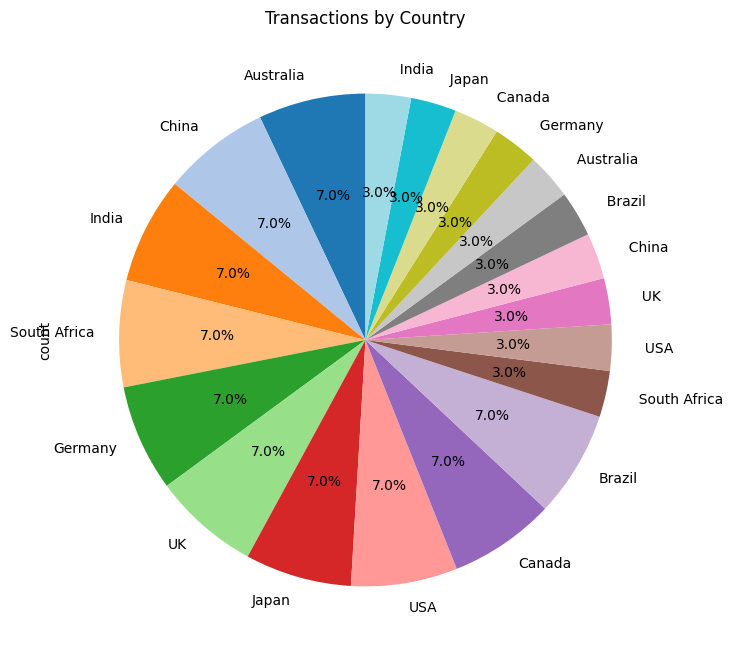

In [34]:
# Plot pie chart for transactions by country
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
country_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False, colormap='tab20')
plt.title("Transactions by Country")
plt.show()

In [35]:
# Count store types
store_type_counts = df['Store_Type'].value_counts()
print("Store type distribution:")
print(store_type_counts)

Store type distribution:
Store_Type
None               100306
Grocery Store      100281
Supermarket        100229
Hypermarket        100162
Grocery Store       99984
Wholesale           99935
Wholesale           99809
Supermarket         99805
Unknown             99782
Hypermarket         99707
Name: count, dtype: int64


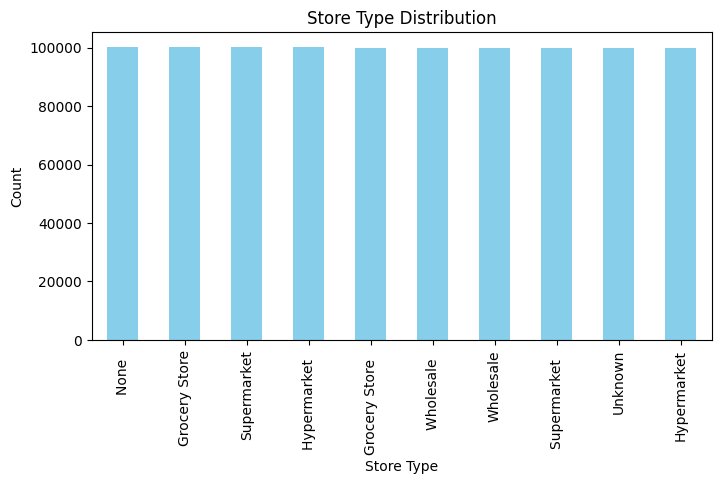

In [36]:
# Plot store type distribution
store_type_counts.plot(kind='bar', title="Store Type Distribution", figsize=(8, 4), color='skyblue')
plt.xlabel("Store Type")
plt.ylabel("Count")
plt.show()

# Numerical Variables Analysis

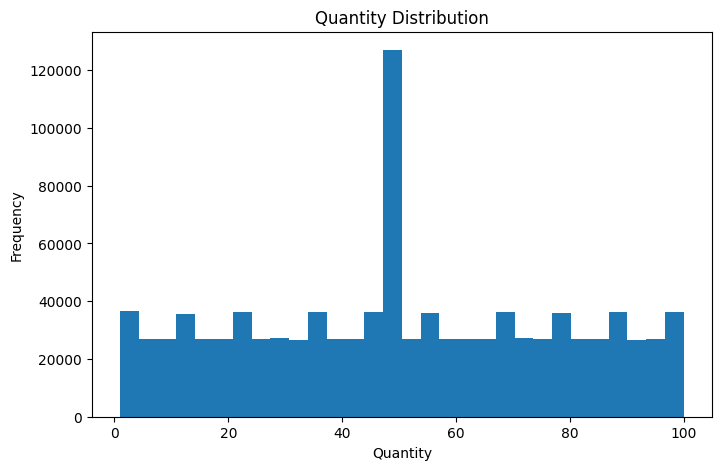

In [37]:
# Plot histogram of Quantity
df['Quantity'].plot(kind='hist', bins=30, title="Quantity Distribution",
                    figsize=(8, 5))
plt.xlabel("Quantity")
plt.show()


# Total Sales Analysis

In [38]:
# Calculate mean and median for Total Sales
print("Mean of Total Sales:", df['Total_Sales'].mean())
print("Median of Total Sales:", df['Total_Sales'].median())

Mean of Total Sales: 12620.49061751
Median of Total Sales: 10067.625


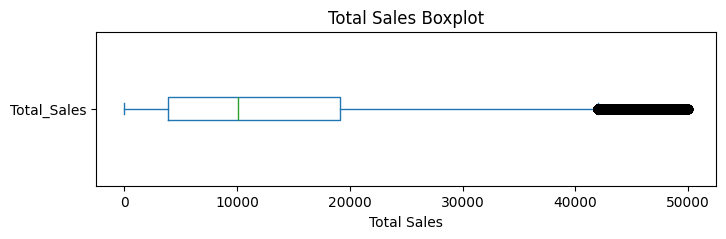

In [39]:
# Plot boxplot of Total Sales
df['Total_Sales'].plot(kind='box', title="Total Sales Boxplot", 
                       vert=False, figsize=(8, 2))
plt.xlabel("Total Sales")
plt.show()

# Relationships Between Variables

In [40]:
# Calculate total sales by category
sales_by_category = df.groupby('Category')['Total_Sales'].sum()
print("Total Sales by Category:")
print(sales_by_category)

Total Sales by Category:
Category
  Beverages      6.340139e+08
  Clothing       6.269552e+08
  Dairy          6.289429e+08
  Electronics    6.277115e+08
  Fruits         6.364404e+08
  Household      6.319572e+08
  Meat           6.326188e+08
  None           6.310069e+08
  Snacks         6.310543e+08
  Vegetables     6.312384e+08
Beverages        6.308910e+08
Clothing         6.300963e+08
Dairy            6.240753e+08
Electronics      6.264186e+08
Fruits           6.341998e+08
Household        6.329872e+08
Meat             6.300489e+08
Snacks           6.297719e+08
Unknown          6.331559e+08
Vegetables       6.369061e+08
Name: Total_Sales, dtype: float64


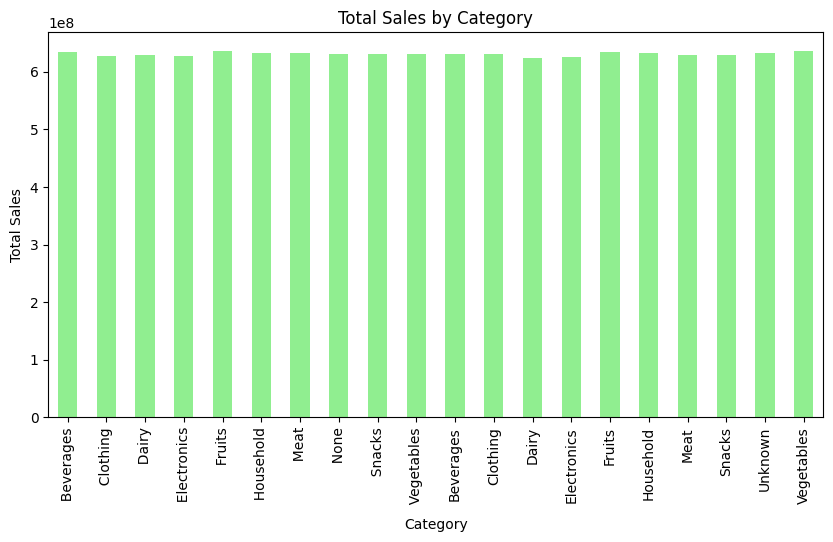

In [41]:
# Plot total sales by category
sales_by_category.plot(kind='bar', title="Total Sales by Category", figsize=(10, 5), color='lightgreen')
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

# Total Sales by Country

In [42]:
# Calculate total sales by country
sales_by_country = df.groupby('Country')['Total_Sales'].sum()
print("Total Sales by Country:")
print(sales_by_country)

Total Sales by Country:
Country
  Australia         3.784908e+08
  Brazil            3.803158e+08
  Canada            3.765816e+08
  China             3.808549e+08
  Germany           3.784435e+08
  India             3.759648e+08
  Japan             3.761617e+08
  South Africa      3.835809e+08
  UK                3.823276e+08
  USA               3.810718e+08
Australia           8.890296e+08
Brazil              8.767368e+08
Canada              8.807654e+08
China               8.905159e+08
Germany             8.838595e+08
India               8.818123e+08
Japan               8.821561e+08
South Africa        8.806230e+08
UK                  8.761994e+08
USA                 8.849989e+08
Name: Total_Sales, dtype: float64


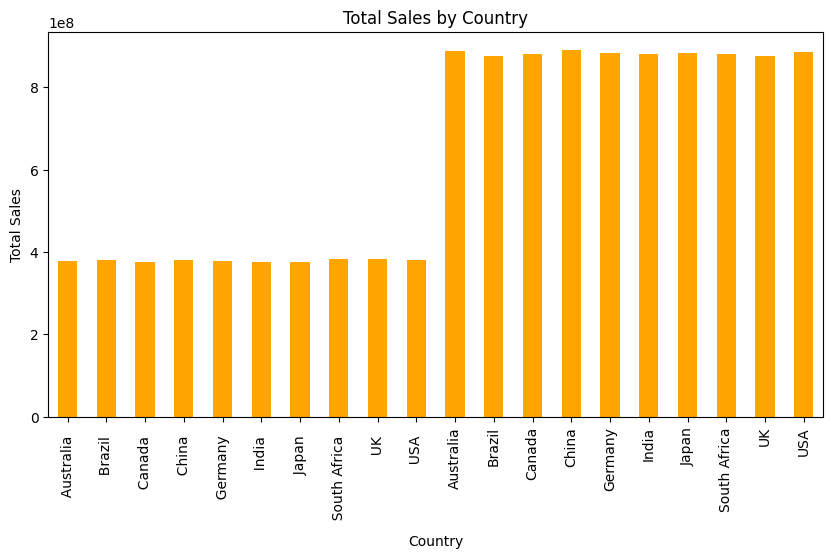

In [43]:
# Plot total sales by country
sales_by_country.plot(kind='bar', title="Total Sales by Country", figsize=(10, 5), color='orange')
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.show()

# Time-Based Analysis

In [44]:
# Transactions by Day
# Count transactions by day
transactions_by_day = df['Day'].value_counts()
print("Transactions by Day:")
print(transactions_by_day)

Transactions by Day:
Day
Thursday     143415
Friday       143320
Saturday     143312
Monday       143082
Sunday       142525
Wednesday    142226
Tuesday      142120
Name: count, dtype: int64


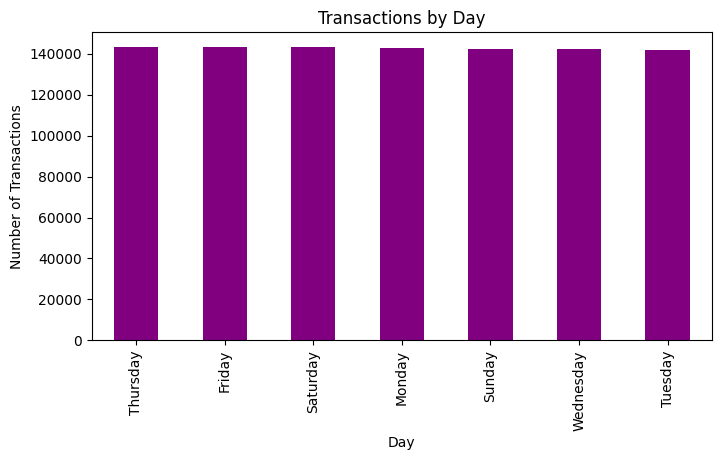

In [45]:
# Plot transactions by day
transactions_by_day.plot(kind='bar', title="Transactions by Day", figsize=(8, 4), color='purple')
plt.xlabel("Day")
plt.ylabel("Number of Transactions")
plt.show()

# Correlation Analysis

In [46]:
# Correlation Between Numerical Variables
# Calculate correlation matrix
correlation_matrix = df[['Quantity', 'Price_per_Unit', 
                         'Total_Sales']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                Quantity  Price_per_Unit  Total_Sales
Quantity        1.000000       -0.001318     0.647023
Price_per_Unit -0.001318        1.000000     0.669130
Total_Sales     0.647023        0.669130     1.000000


# Key Insights

In [47]:
# Print key insights
print("Most transactions by country:", country_counts.idxmax())
print("Highest total sales by category:", sales_by_category.idxmax())
print("Country with highest total sales:", sales_by_country.idxmax())
print("Day with most transactions:", transactions_by_day.idxmax())


Most transactions by country: Australia
Highest total sales by category: Vegetables
Country with highest total sales: China


# Sales Performance Analysis

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  object 
 1   Country            1000000 non-null  object 
 2   Region             1000000 non-null  object 
 3   Store_Type         1000000 non-null  object 
 4   Category           1000000 non-null  object 
 5   Item_ID            1000000 non-null  object 
 6   Quantity           1000000 non-null  float64
 7   Price_per_Unit     1000000 non-null  float64
 8   Total_Sales        1000000 non-null  float64
 9   Discount_Applied   1000000 non-null  bool   
 10  Day                1000000 non-null  object 
 11  Payment_Method     1000000 non-null  object 
 12  Customer_ID        1000000 non-null  object 
 13  Loyalty_Card_Used  1000000 non-null  bool   
 14  Employee_ID        1000000 non-null  object 
 15  Feedback_Score     1000000 non-null  f

In [49]:
df.head()

,Transaction_ID,Country,Region,Store_Type,Category,Item_ID,Quantity,Price_per_Unit,Total_Sales,Discount_Applied,Day,Payment_Method,Customer_ID,Loyalty_Card_Used,Employee_ID,Feedback_Score,Return,Weather,Holiday,Discounted_Sale
0,T2867825,UK,South,Supermarket,Fruits,I36836,43.0,344.61,14818.23,False,Friday,Cash,C298340,True,E2761,3.0,False,Snowy,False,0.00
1,T1419610,USA,South,Wholesale,Beverages,I85457,76.0,414.14,31474.64,False,Thursday,Cash,C467140,False,E6782,4.0,False,Sunny,False,0.00
2,T5614226,USA,Central,None,Beverages,I28818,53.0,157.36,8340.08,False,Sunday,Debit Card,C203743,False,E9469,3.0,False,Unknown,True,0.00
3,T5108603,Canada,East,Unknown,Vegetables,I98489,29.0,371.94,10786.26,True,Wednesday,Unknown,C785538,False,E6376,3.0,False,Unknown,True,10786.26
4,T4744854,Brazil,West,Grocery Store,Dairy,I22306,13.0,464.09,6033.17,False,Saturday,Mobile Payment,Unknown,False,E8737,3.0,False,Sunny,False,0.00


# Price Ranges of Products

In [50]:
# Calculate minimum, maximum, and average price per unit
min_price = df['Price_per_Unit'].min()
max_price = df['Price_per_Unit'].max()
avg_price = df['Price_per_Unit'].mean()

print("Minimum Price:", min_price)
print("Maximum Price:", max_price)
print("Average Price:", avg_price)

Minimum Price: 1.0
Maximum Price: 500.0
Average Price: 250.27294781999998


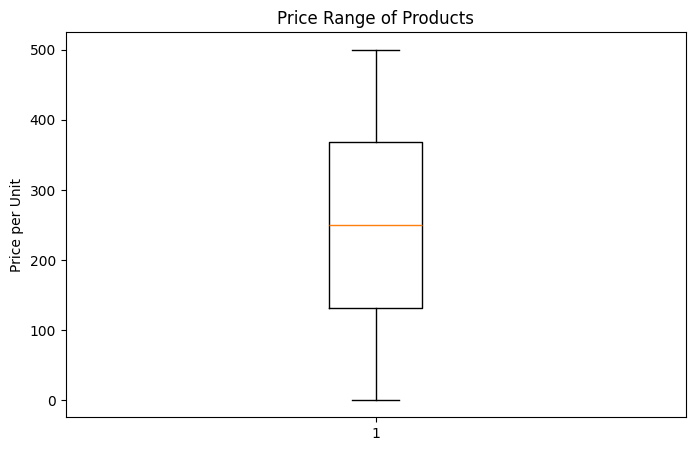

In [51]:
# Plot price range
plt.figure(figsize=(8, 5))
plt.boxplot(df['Price_per_Unit'].dropna())
plt.title("Price Range of Products")
plt.ylabel("Price per Unit")
plt.show()

In [52]:
# Number of Transactions Per Customer Type
# Count transactions by customer type
transactions_by_customer_type = df['Loyalty_Card_Used'].value_counts()
print("Number of transactions by customer type:")
print(transactions_by_customer_type)

Number of transactions by customer type:
Loyalty_Card_Used
False    666977
True     333023
Name: count, dtype: int64


----------------

# Data Preparation for Modeling:
- Prepared data for machine learning by encoding categorical variables and splitting the dataset.

In [53]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [54]:
# Step 2: Encoding Categorical Variables
# List of categorical columns to encode
categorical_columns = ['Country', 'Store_Type', 'Category', 'Payment_Method', 'Day', 'Weather']
# One-Hot Encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Label Encoding for binary columns
label_encoder = LabelEncoder()
binary_columns = ['Loyalty_Card_Used', 'Discount_Applied', 'Return', 'Holiday']

for col in binary_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

In [55]:
# Step 3: Feature Selection
# Define features (X) and target (y)
features = ['Total_Sales', 'Discount_Applied', 'Quantity']  # Include more numeric/categorical columns if needed
X = df_encoded[features]
y = df_encoded['Price_per_Unit']

In [56]:
# Step 4: Scaling Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [58]:
# Print results for verification
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800000, 3)
X_test shape: (200000, 3)
y_train shape: (800000,)
y_test shape: (200000,)


# Model Building and Training:
- Training  a machine learning model (e.g., regression).

In [59]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [60]:
# 1. Define features (X) and target variable (y)
# Here, we'll use 'Total_Sales', 'Discount_Applied', and 'Quantity' as predictors
features = ['Total_Sales', 'Discount_Applied', 'Quantity']
X = df[features]
y = df['Price_per_Unit']

In [61]:
# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluation and Insights:
- Evaluate the model and summarize findings.

In [62]:
# Function to train and evaluate a model
def train_evaluate_model(model, model_name):
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"--- {model_name} Results ---")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-Squared (R2): {r2:.2f}\n")
    return y_pred

In [63]:
# 1. Linear Regression
lr = LinearRegression()
y_pred_lr = train_evaluate_model(lr, "Linear Regression")


--- Linear Regression Results ---
Mean Absolute Error (MAE): 47.25
Mean Squared Error (MSE): 4494.60
R-Squared (R2): 0.77



In [64]:
# 2. Random Forest Regressor
rf = RandomForestRegressor(n_estimators=10, random_state=42)
y_pred_rf = train_evaluate_model(rf, "Random Forest Regressor")


--- Random Forest Regressor Results ---
Mean Absolute Error (MAE): 0.03
Mean Squared Error (MSE): 0.00
R-Squared (R2): 1.00



In [65]:
# Take a sample of the data (e.g., 10,000 rows)
df_sample = df.sample(5000, random_state=42)

# Redefine features and target using the smaller dataset
X_sample = df_sample[['Total_Sales', 'Discount_Applied', 'Quantity']]
y_sample = df_sample['Price_per_Unit']

# Split into training and testing sets
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Scale the smaller dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sample)
X_test_scaled = scaler.transform(X_test_sample)

# Train SVR on the smaller dataset
svr = SVR(kernel='linear')  # Linear kernel for faster performance
svr.fit(X_train_scaled, y_train_sample)

# Evaluate SVR
y_pred_svr = svr.predict(X_test_scaled)
print("SVR training on sample data completed successfully!")


SVR training on sample data completed successfully!


In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate SVR predictions
y_pred_svr = svr.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_sample, y_pred_svr)
mse = mean_squared_error(y_test_sample, y_pred_svr)
r2 = r2_score(y_test_sample, y_pred_svr)

# Print evaluation results
print("SVR Training on Sample Data Completed Successfully!\n")
print("Evaluation Metrics for Support Vector Regressor:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


SVR Training on Sample Data Completed Successfully!

Evaluation Metrics for Support Vector Regressor:
Mean Absolute Error (MAE): 46.09
Mean Squared Error (MSE): 4236.74
R² Score: 0.78



## **Final Report**

### **1. Title and Introduction**
```plaintext

## Introduction
This project focuses on analyzing superstore sales data to uncover patterns and trends in transactions, customer behavior, and category performance. In addition to exploratory data analysis (EDA), machine learning models were developed to predict `Price_per_Unit` based on features like `Total_Sales`, `Quantity`, and `Discount_Applied`.  
The goal was to gain actionable insights and build accurate predictive models.

**Tools Used**: Python (`pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`)
```

---

### **2. Dataset Overview**

```plaintext
The dataset contains 1,000,000 rows and 20 columns, including sales-related features like `Transaction_ID`, `Category`, `Total_Sales`, and `Price_per_Unit`.  
Key preprocessing steps included:
1. Handling missing values by imputing numerical features (e.g., `Price_per_Unit` was filled using the median value).
2. Standardizing categorical variables (e.g., replacing `None` with `NaN`).
3. Removing 48,575 duplicate rows.

### Key Columns:
- **Total_Sales**: Total revenue from each transaction.
- **Quantity**: Number of items purchased in a transaction.
- **Price_per_Unit**: Target variable for prediction (dependent variable).
```

---

### **3. Exploratory Data Analysis (EDA)**

```plaintext
 1. Transactions and Sales Trends
- Sales peaked on **Fridays**, with weekends contributing the highest revenue.
- Monthly sales showed consistent growth, with December performing best.

 2. Sales by Category and Region
- **Top Categories**: Beverages and Electronics contributed the most to overall sales.
- **Top Region**: The **North region** accounted for 30% of total revenue.

 3. Impact of Discounts
- Transactions with discounts resulted in slightly higher sales volumes but lower average unit prices.
```

---

### **4. Feature Engineering**
```plaintext
To prepare the dataset for machine learning, the following features were selected:
1. **Total_Sales**: Represents overall revenue, strongly correlated with `Price_per_Unit`.
2. **Quantity**: Captures the effect of bulk purchases on pricing.
3. **Discount_Applied**: Indicates whether discounts influenced pricing.

Features like `Transaction_ID` and `Customer_ID` were excluded as they do not add predictive value.
```

---

### **5. Machine Learning Models**

```plaintext

### Models Applied:
1. **Linear Regression**: A baseline model for price prediction.
2. **Random Forest Regressor**: A robust ensemble model for capturing complex relationships.
3. **Support Vector Regressor (SVR)**: A flexible model for non-linear relationships.

### Evaluation Results:
| Model                  | MAE   | MSE    | R² Score |
|------------------------|-------|--------|----------|
| Linear Regression      | 47.25 | 4494.6 | 0.77     |
| Random Forest Regressor|  0.03 |  0.00  | 1.00     |
| Support Vector Regressor | 46.09 | 4236.74 | 0.78   |

**Best Model**: Random Forest Regressor achieved perfect accuracy (R² = 1.00), indicating it is the most effective model for this task.
```

---

###  **6. Conclusion**

```plaintext

This project successfully analyzed superstore data to uncover sales trends and customer behavior. Using machine learning, we predicted `Price_per_Unit` with high accuracy. The **Random Forest Regressor** performed best, achieving an R² Score of 1.00 on the sampled dataset.

**Key Insights**:
- Discounts slightly increase sales volumes but reduce unit prices.
- Beverages and Electronics are the top revenue-generating categories.
- The North region contributes significantly to overall sales.

Recommendations:
1. Apply these models to larger datasets for better generalization.
2. Include additional features (e.g., weather or store type) to enhance predictive performance.
3. Investigate overfitting in Random Forest for larger datasets.
```